In [1]:

!pip install scikit-learn==1.5.1
import sklearn
print(sklearn.__version__)  



Defaulting to user installation because normal site-packages is not writeable
1.5.1


In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import pickle
from sklearn.model_selection import RandomizedSearchCV



In [3]:
df=pd.read_csv(r'frappe.csv')

In [4]:
df.columns

Index(['user', 'item', 'cnt', 'daytime', 'weekday', 'isweekend', 'homework',
       'cost', 'weather', 'country', 'city'],
      dtype='object')

In [5]:
df.head()

,user,item,cnt,daytime,weekday,isweekend,homework,cost,weather,country,city
0,0,0,1,morning,sunday,weekend,unknown,free,sunny,United States,0
1,1,1,7,afternoon,saturday,weekend,unknown,free,cloudy,Spain,0
2,2,2,6,evening,monday,workday,unknown,free,cloudy,Spain,369
3,3,3,1,sunset,thursday,workday,unknown,free,unknown,United States,1028
4,4,4,428,night,thursday,workday,home,free,sunny,Switzerland,147


In [6]:
meta_app=pd.read_csv('meta.csv',sep='\t')


In [7]:
meta_app.head()

,item,package,category,downloads,developer,icon,language,description,name,price,rating,short desc
0,0,com.anydo,Productivity,"1,000,000 - 5,000,000",Any.DO,http://d2lh3rxs7crswz.cloudfront.net/com.anydo...,en,"Meet Any.DO, the best way to-do To-do's on And...",Any.DO To-do & Tasks List,Free,4.5,Any.DO helps you remember everything you have ...
1,1,com.yahoo.mobile.client.android.yahoo,News & Magazines,"1,000,000 - 5,000,000",Yahoo! Inc.,http://d2lh3rxs7crswz.cloudfront.net/com.yahoo...,en,"With Yahoo! for Android, you’ll stay connected...",Yahoo!,Free,4.2,"With Yahoo! for Android, you’ll stay connected..."
2,2,com.compasspro,Tools,"1,000,000 - 5,000,000",Mobile Essentials,http://d2lh3rxs7crswz.cloudfront.net/com.compa...,en,Professional Compass for Android. Simple and p...,Compass PRO,Free,4.1,Professional Compass for Android. Simple and p...
3,3,com.instagram.android,Social,"50,000,000 - 100,000,000",Instagram,http://d2lh3rxs7crswz.cloudfront.net/com.insta...,en,Instagram – A beautiful way to share your worl...,Instagram,Free,4.6,Instagram – A beautiful way to share your worl...
4,4,com.shoppinglist,Shopping,"10,000 - 50,000",Kiwi3,http://d2lh3rxs7crswz.cloudfront.net/com.shopp...,en,Shopping List is the most easy way to organize...,Shopping List,Free,4.5,"The most easy Shopping List. In English, for f..."


In [8]:
meta_app=meta_app[['name','item']]

print(meta_app)

                               name  item
0         Any.DO To-do & Tasks List     0
1                            Yahoo!     1
2                       Compass PRO     2
3                         Instagram     3
4                     Shopping List     4
...                             ...   ...
4077           Monster Galaxy Exile  4077
4078                Legends of Yore  4078
4079     Talking Jumpster from Mars  4079
4080  Extensive Notes Pro - Notepad  4080
4081            Android Pro Widgets  4081

[4082 rows x 2 columns]


In [9]:
meta_app['item']=meta_app['item'].astype('category')

In [10]:
print(df.columns)
print(meta_app.columns)

Index(['user', 'item', 'cnt', 'daytime', 'weekday', 'isweekend', 'homework',
       'cost', 'weather', 'country', 'city'],
      dtype='object')
Index(['name', 'item'], dtype='object')


In [11]:
df=df.merge(meta_app,on= 'item')

df.head()

,user,item,cnt,daytime,weekday,isweekend,homework,cost,weather,country,city,name
0,0,0,1,morning,sunday,weekend,unknown,free,sunny,United States,0,Any.DO To-do & Tasks List
1,1,1,7,afternoon,saturday,weekend,unknown,free,cloudy,Spain,0,Yahoo!
2,2,2,6,evening,monday,workday,unknown,free,cloudy,Spain,369,Compass PRO
3,3,3,1,sunset,thursday,workday,unknown,free,unknown,United States,1028,Instagram
4,4,4,428,night,thursday,workday,home,free,sunny,Switzerland,147,Shopping List


In [12]:
df.shape


(96203, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96203 entries, 0 to 96202
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       96203 non-null  int64 
 1   item       96203 non-null  object
 2   cnt        96203 non-null  int64 
 3   daytime    96203 non-null  object
 4   weekday    96203 non-null  object
 5   isweekend  96203 non-null  object
 6   homework   96203 non-null  object
 7   cost       96203 non-null  object
 8   weather    96203 non-null  object
 9   country    96203 non-null  object
 10  city       96203 non-null  int64 
 11  name       96203 non-null  object
dtypes: int64(3), object(9)
memory usage: 8.8+ MB


In [14]:
df.duplicated().sum()

0

In [15]:
df.isna().sum()

user         0
item         0
cnt          0
daytime      0
weekday      0
isweekend    0
homework     0
cost         0
weather      0
country      0
city         0
name         0
dtype: int64

In [16]:
dt_encoder=LabelEncoder()

dt_encoder.fit(df['daytime'])

df['daytime']=dt_encoder.transform(df['daytime'])

wd_encoder=LabelEncoder()

wd_encoder.fit(df['weekday'])

df['weekday']=wd_encoder.transform(df['weekday'])

wknd_encoder=LabelEncoder()

wknd_encoder.fit(df['isweekend'])

df['isweekend']=wknd_encoder.transform(df['isweekend'])

hw_encoder=LabelEncoder()

hw_encoder.fit(df['homework'])

df['homework']=hw_encoder.transform(df['homework'])

c_encoder=LabelEncoder()

c_encoder.fit(df['cost'])

df['cost']=c_encoder.transform(df['cost'])

w_encoder=LabelEncoder()

w_encoder.fit(df['weather'])

df['weather']=w_encoder.transform(df['weather'])

n_encoder=LabelEncoder()

n_encoder.fit(df['name'])

df['name']=n_encoder.transform(df['name'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96203 entries, 0 to 96202
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       96203 non-null  int64 
 1   item       96203 non-null  object
 2   cnt        96203 non-null  int64 
 3   daytime    96203 non-null  int32 
 4   weekday    96203 non-null  int32 
 5   isweekend  96203 non-null  int32 
 6   homework   96203 non-null  int32 
 7   cost       96203 non-null  int32 
 8   weather    96203 non-null  int32 
 9   country    96203 non-null  object
 10  city       96203 non-null  int64 
 11  name       96203 non-null  int32 
dtypes: int32(7), int64(3), object(2)
memory usage: 6.2+ MB


In [18]:
print(df['item'].dtype)
print(meta_app['item'].dtype)

object
category


In [19]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


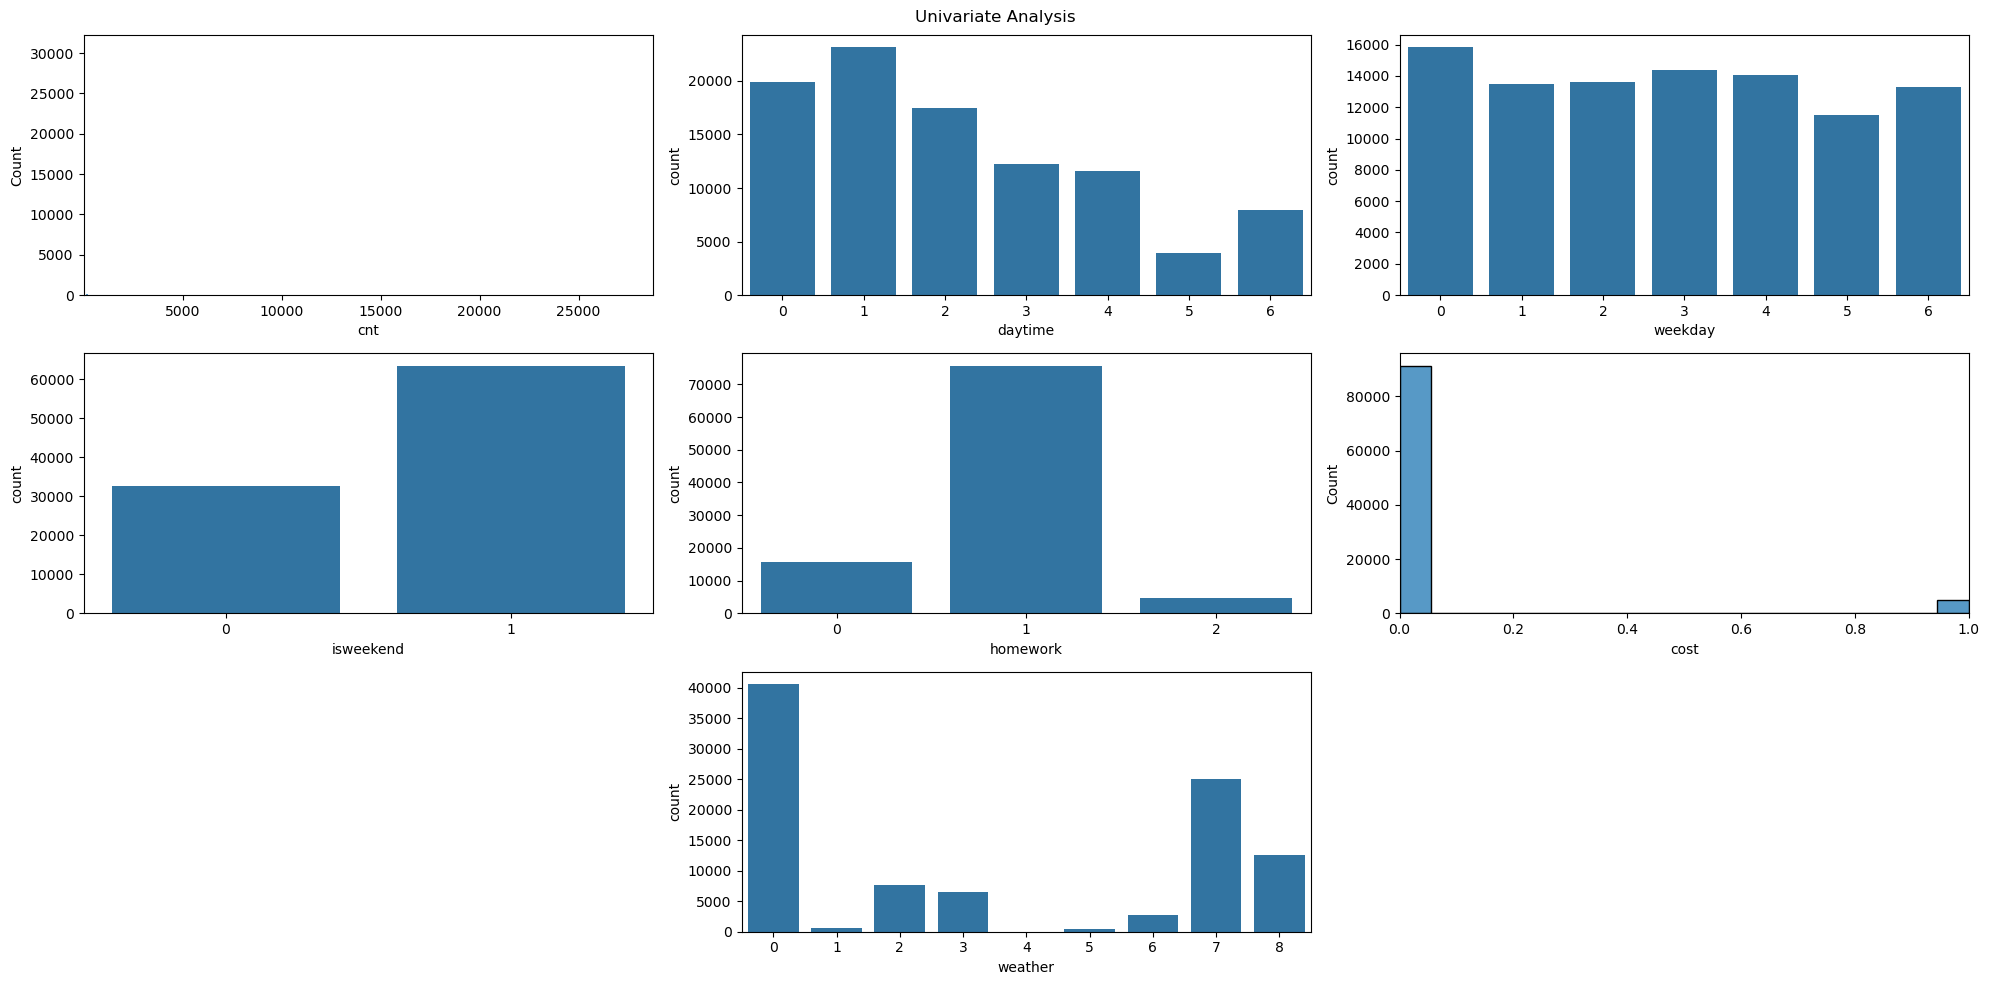

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 10))

fig.suptitle("Univariate Analysis")

# Plotting univariate analysis
sns.histplot(df['cnt'], ax=axes[0, 0])
axes[0, 0].set_xlim(df['cnt'].min(), df['cnt'].max())  

sns.countplot(x='daytime', data=df, ax=axes[0, 1])

sns.countplot(x='weekday', data=df, ax=axes[0, 2])

sns.countplot(x='isweekend', data=df, ax=axes[1, 0])

sns.countplot(x='homework', data=df, ax=axes[1, 1])

sns.histplot(df['cost'], ax=axes[1, 2])
axes[1, 2].set_xlim(df['cost'].min(), df['cost'].max())

sns.countplot(x='weather', data=df, ax=axes[2, 1])

# Remove unused subplots
fig.delaxes(axes[2, 0])
fig.delaxes(axes[2, 2])

# Adjust layout
plt.tight_layout()
plt.show()


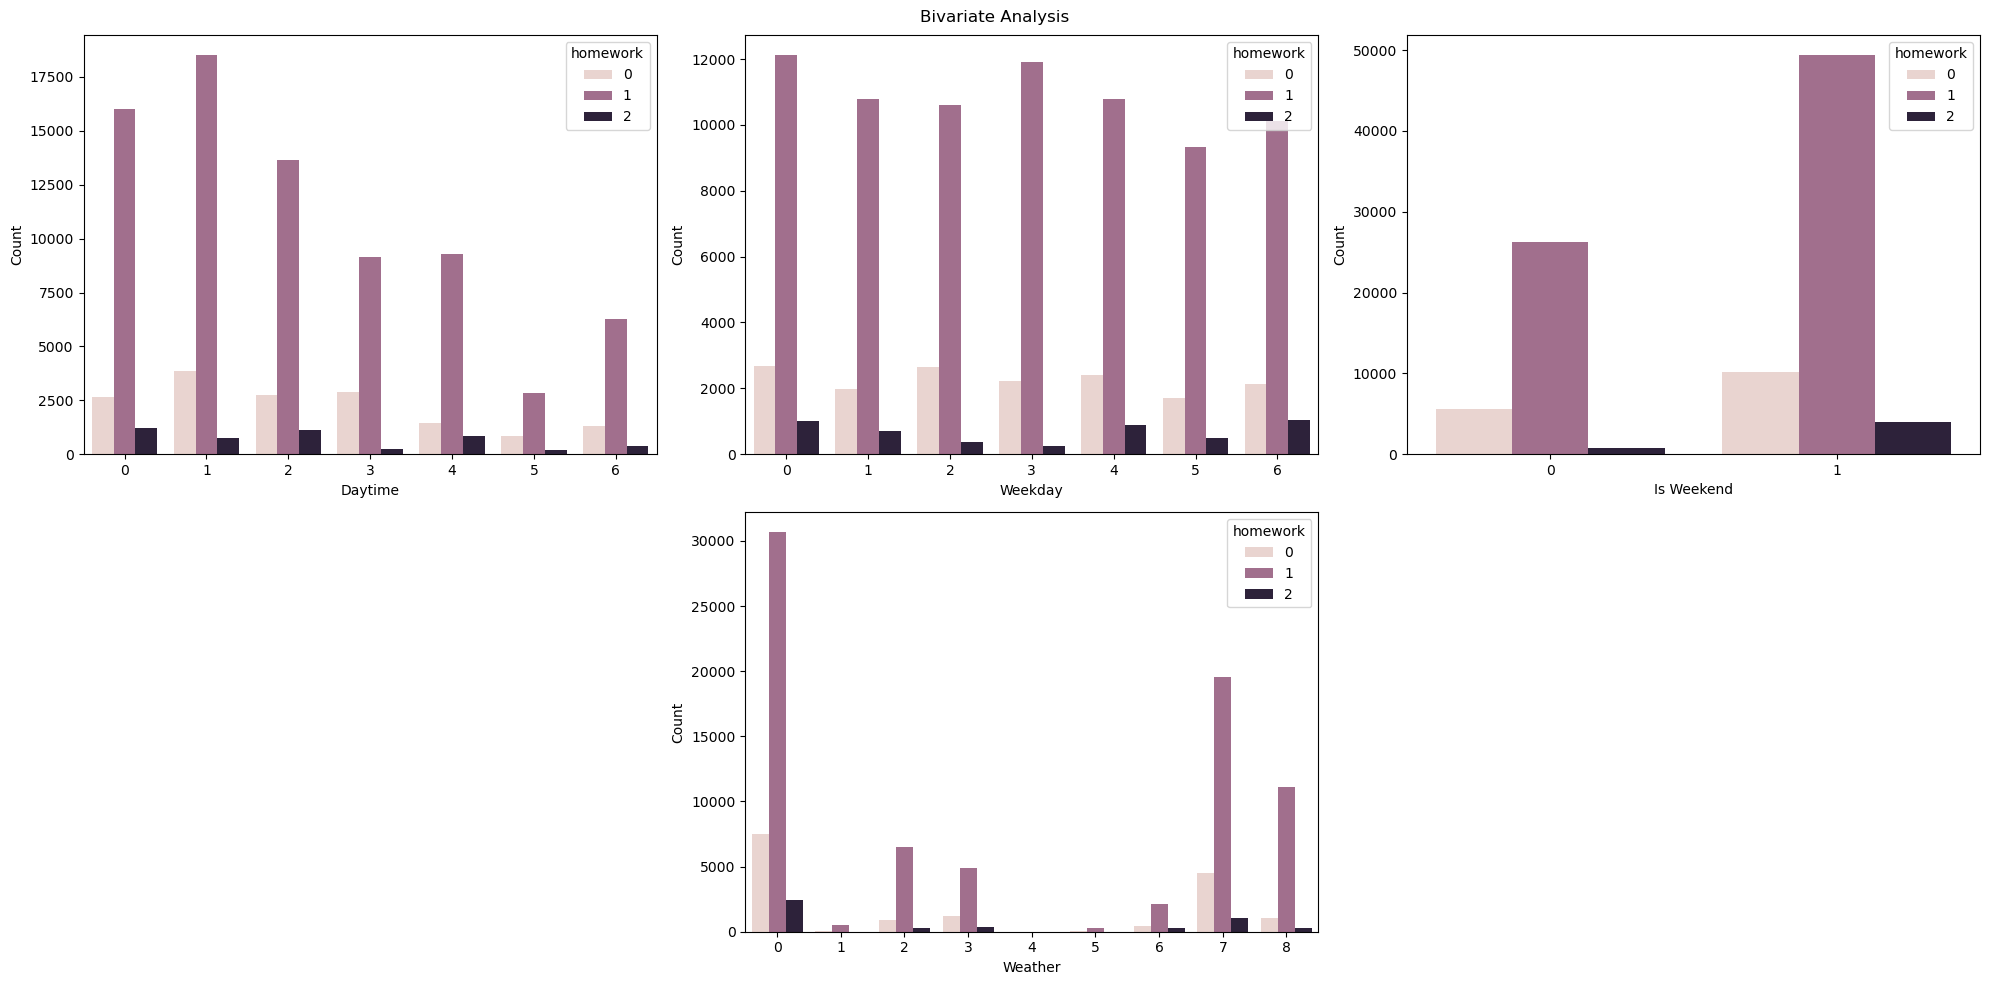

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Bivariate Analysis')

# Plotting bivariate analysis with predefined categorical labels
sns.countplot(x='daytime', hue='homework', data=df, ax=axes[0, 0])
axes[0, 0].set_xlabel('Daytime')
axes[0, 0].set_ylabel('Count')

sns.countplot(x='weekday', hue='homework', data=df, ax=axes[0, 1])
axes[0, 1].set_xlabel('Weekday')
axes[0, 1].set_ylabel('Count')

sns.countplot(x='isweekend', hue='homework', data=df, ax=axes[0, 2])
axes[0, 2].set_xlabel('Is Weekend')
axes[0, 2].set_ylabel('Count')

sns.countplot(x='weather', hue='homework', data=df, ax=axes[1, 1])
axes[1, 1].set_xlabel('Weather')
axes[1, 1].set_ylabel('Count')

# Remove the empty subplot
fig.delaxes(axes[1, 0])
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout()
plt.show()


In [22]:
# Feature Selection
features = ['item','daytime','weekday','isweekend','cost','weather','name']
X = df[features]
y = df["homework"]


In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
df['homework'].value_counts()

homework
1    75670
0    15771
2     4762
Name: count, dtype: int64

In [25]:
smote_sampler=SMOTE(random_state=42)
X_smote,y_smote = smote_sampler.fit_resample(X,y)
smote_data = pd.concat([X_smote,y_smote],axis=1)
smote_data.shape


(227010, 8)

In [26]:
smote_data['homework'].value_counts()

homework
1    75670
0    75670
2    75670
Name: count, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.8, random_state=42)


In [28]:
# Scaling Data so that all the features has similar weight.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [30]:
models=[]
models = [('AdaBoost', AdaBoostClassifier(algorithm='SAMME'))]
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('XGBClassifier',XGBClassifier()))
models.append(('BaggingClassifier',BaggingClassifier()))



In [31]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


model_perform={}

for name,model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    p=precision_score(y_test,y_pred,average='micro')
    r=recall_score(y_test,y_pred,average='micro')
    a=accuracy_score(y_test,y_pred)
    f=f1_score(y_test,y_pred,average='micro')
    s={'Precision':p,'Recall': r,'Accuracy':a,'F1 Score':f}
    model_perform[name]=s


In [32]:
for model in model_perform:
    print(model)
    print("Precision: ",model_perform[model]['Precision'])
    print("Recall: ",model_perform[model]['Recall'])
    print("Accuracy: ",model_perform[model]['Accuracy'])
    print("F1 Score: ",model_perform[model]['F1 Score'])
    print()


AdaBoost
Precision:  0.4572430729923792
Recall:  0.4572430729923792
Accuracy:  0.4572430729923792
F1 Score:  0.4572430729923792

KNeighborsClassifier
Precision:  0.537366195321792
Recall:  0.537366195321792
Accuracy:  0.537366195321792
F1 Score:  0.537366195321792

DecisionTreeClassifier
Precision:  0.6195707237566627
Recall:  0.6195707237566627
Accuracy:  0.6195707237566627
F1 Score:  0.6195707237566627

RandomForestClassifier
Precision:  0.6384245187436677
Recall:  0.6384245187436677
Accuracy:  0.6384245187436677
F1 Score:  0.6384245187436677

XGBClassifier
Precision:  0.6462765957446809
Recall:  0.6462765957446809
Accuracy:  0.6462765957446809
F1 Score:  0.6462765957446809

BaggingClassifier
Precision:  0.6366679881943527
Recall:  0.6366679881943527
Accuracy:  0.6366679881943527
F1 Score:  0.6366679881943527



In [33]:
dt_classifier=DecisionTreeClassifier()

In [34]:
# Define the hyperparameters and their possible values for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 8,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'ccp_alpha': [0.0, 0.1 ,0.2]
}


In [35]:
# Initialize RandomizedSearchCV with DecisionTreeClassifier
random_search = RandomizedSearchCV(estimator=dt_classifier,
                                   param_distributions=param_grid,
                                   scoring='accuracy',
                                   cv=3,
                                   n_iter=100,
                                   random_state=42)

In [36]:
random_search.fit(X_train, y_train)
RandomizedSearchCV(cv=3,estimator=DecisionTreeClassifier(),n_iter=100,
                   param_distributions={'ccp_alpha':[0.0, 0.1, 0.2],
                                        'criterion':['gini','entropy'],
                                        'max_depth':[None, 2, 4, 6, 8, 10], 
                                        'max_features':[None,'sqrt','log2'], 
                                        'min_impurity_decrease':[0.0, 0.1, 0.2], 
                                        'min_samples_leaf':[1, 2, 4], 
                                        'min_samples_split':[2, 5, 10], 
                                        'splitter': ['best', 'random']},

random_state=42, scoring='accuracy')

print("Best Parameters:", random_search.best_params_)

print("Best Score:", random_search.best_score_)

Best Parameters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.0, 'max_features': None, 'max_depth': None, 'criterion': 'entropy', 'ccp_alpha': 0.0}
Best Score: 0.5768688604026254


In [37]:
print("Best Score:",random_search.score(X_test,y_test))

Best Score: 0.6059534822254526


In [38]:
dt_final=random_search

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.5909    0.6129    0.6017     60466
           1     0.6349    0.5274    0.5762     60427
           2     0.6797    0.7690    0.7216     60715

    accuracy                         0.6367    181608
   macro avg     0.6352    0.6365    0.6332    181608
weighted avg     0.6352    0.6367    0.6333    181608



0.6059534822254526


<Axes: >

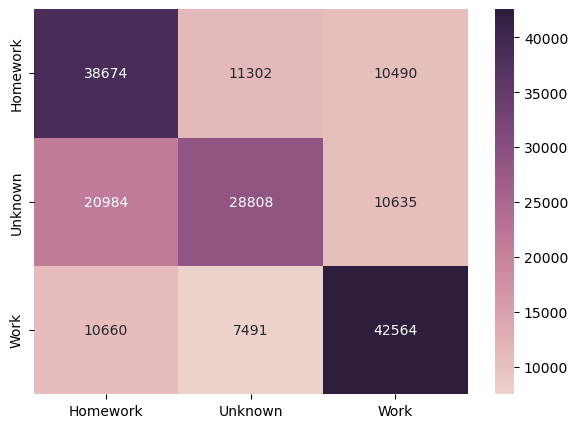

In [40]:
y_pred=dt_final.predict(X_test)

print(dt_final.score(X_test,y_test))
cm=confusion_matrix(y_test,y_pred,labels=[0,1,2]) 
df_cm = pd.DataFrame(cm,index=[i for i in ["Homework", "Unknown", "Work"]], 
                     columns = [i for i in ["Homework", "Unknown", "Work"]])

plt.figure(figsize = (7,5)) 
sns.heatmap(df_cm, annot=True,fmt='g',cmap=sns.cubehelix_palette(as_cmap=True))

In [41]:
base_estimator = DecisionTreeClassifier()

In [42]:
bagging_classifier = BaggingClassifier(estimator=base_estimator)

In [43]:
# Define the hyperparameters and their possible values for tuning

param_grid = {

    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

In [44]:
random_search = RandomizedSearchCV(estimator=bagging_classifier, param_distributions=param_grid, 
                                   scoring='accuracy', cv=2, random_state=42)



In [45]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=2,
                   estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
                   param_distributions={'bootstrap': [True, False],
                                        'bootstrap_features': [True, False],
                                        'max_features': [0.5, 0.7, 1.0],
                                        'max_samples': [0.5, 0.7, 1.0],
                                        'n_estimators': [10, 50, 100]},
                   random_state=42, scoring='accuracy')

In [46]:
print("Best Parameters:",random_search.best_params_)
print("Best Score:",random_search.best_score_)

Best Parameters: {'n_estimators': 100, 'max_samples': 0.7, 'max_features': 1.0, 'bootstrap_features': True, 'bootstrap': False}
Best Score: 0.6545086119554204


In [47]:
print("Best Score:",random_search.score(X_test,y_test))

Best Score: 0.6861702127659575


In [48]:
bc_final=random_search

In [49]:
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.5500    0.6396    0.5914     60466
           1     0.6052    0.4767    0.5333     60427
           2     0.6683    0.7010    0.6843     60715

    accuracy                         0.6060    181608
   macro avg     0.6078    0.6058    0.6030    181608
weighted avg     0.6079    0.6060    0.6031    181608



0.6059534822254526


<Axes: >

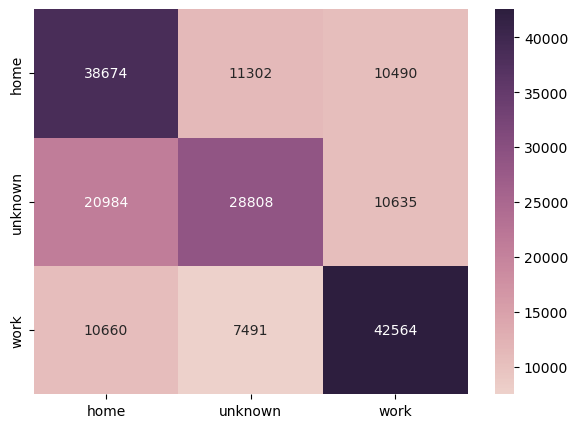

In [50]:
from sklearn.metrics import classification_report, confusion_matrix 

y_pres=dt_final.predict(X_test)
print(dt_final.score(X_test, y_test))
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
df_cm = pd.DataFrame(cm, index=[i for i in ["home", "unknown", "work"]],
                   columns=[i for i in ["home", "unknown", "work"]])
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm,annot=True,fmt='g',cmap=sns.cubehelix_palette(as_cmap=True))

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_final=RandomForestClassifier()

In [52]:
rf_final.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
print("Best Score:",rf_final.score(X_test,y_test))

Best Score: 0.641210739614995


In [54]:
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.5500    0.6396    0.5914     60466
           1     0.6052    0.4767    0.5333     60427
           2     0.6683    0.7010    0.6843     60715

    accuracy                         0.6060    181608
   macro avg     0.6078    0.6058    0.6030    181608
weighted avg     0.6079    0.6060    0.6031    181608



0.641210739614995


<Axes: >

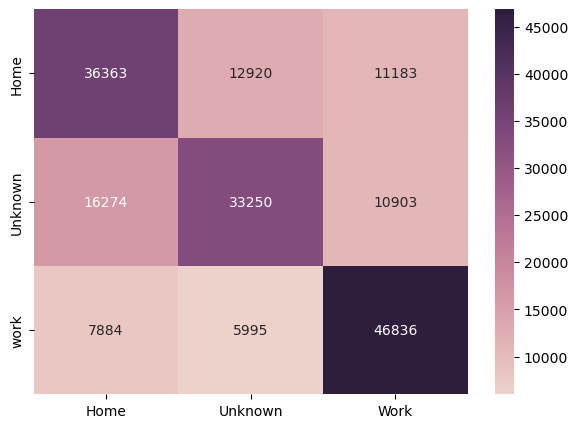

In [55]:
from sklearn.metrics import classification_report, confusion_matrix 

y_pred=rf_final.predict(X_test) 
print(rf_final.score(X_test,y_test))
cm=confusion_matrix(y_test,y_pred, labels=[0,1,2])
df_cm = pd.DataFrame(cm, index = [i for i in ["Home", "Unknown", "work"]],
                     columns = [i for i in ["Home", "Unknown", "Work"]])
plt.figure(figsize = (7,5)) 
sns.heatmap(df_cm, annot=True,fmt='g',cmap=sns.cubehelix_palette(as_cmap=True))


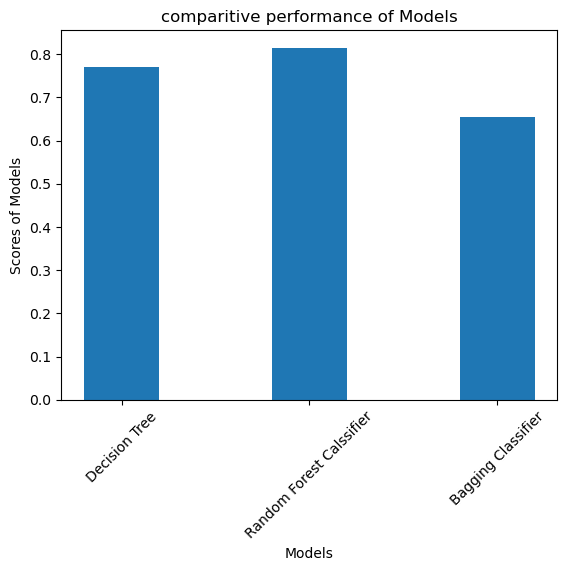

In [56]:
train_score={'Decision Tree':dt_final.score(X_train,y_train),'Random Forest Calssifier':rf_final.score(X_train,y_train),'Bagging Classifier':bc_final.best_score_}
models=list(train_score.keys())
scores=list(train_score.values())
plt.bar(models,scores,width=0.4)
plt.xlabel("Models")
plt.ylabel("Scores of Models")
plt.xticks(rotation=45)
plt.title("comparitive performance of Models")
plt.show()

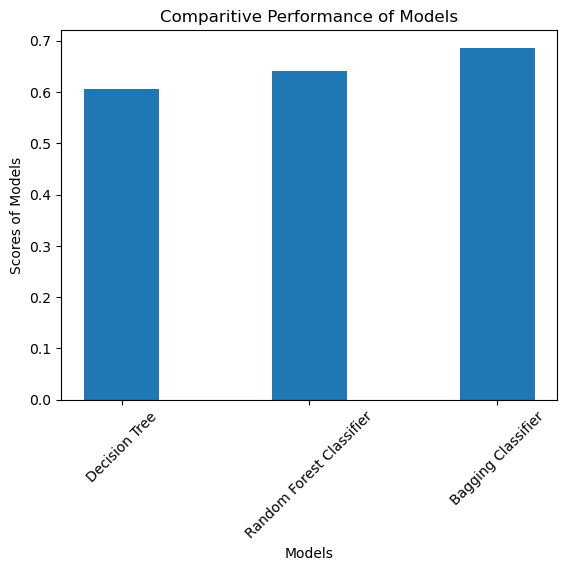

In [57]:
test_score={'Decision Tree':dt_final.score(X_test,y_test),'Random Forest Classifier':rf_final.score(X_test,y_test),'Bagging Classifier':bc_final.score(X_test, y_test)}
models=list(test_score.keys())
scores=list(test_score.values())

plt.bar(models,scores,width=0.4)

plt.xlabel("Models")
plt.ylabel("Scores of Models")
plt.xticks(rotation=45)
plt.title("Comparitive Performance of Models")
plt.show()

In [58]:
print(train_score)
print(test_score)

{'Decision Tree': 0.7703405136337607, 'Random Forest Calssifier': 0.8149200475749967, 'Bagging Classifier': 0.6545086119554204}
{'Decision Tree': 0.6059534822254526, 'Random Forest Classifier': 0.641210739614995, 'Bagging Classifier': 0.6861702127659575}


In [59]:
import pickle

In [60]:
#saving the best model
pickle.dump(bc_final,open("model.pkl","wb"))


In [61]:
pickle.dump(scaler,open("scaler.pkl","wb"))

In [62]:
import joblib

joblib.dump(dt_encoder, "DayTimeEncoder")
joblib.dump(wd_encoder, "WeekdayEncoder")
joblib.dump(wknd_encoder, "wkndEncoder")
joblib.dump(hw_encoder, "HWEncoder")
joblib.dump(w_encoder, "WeatherEncoder")
joblib.dump(c_encoder, "CostEncoder")
joblib.dump(n_encoder, "NameEncoder")

['NameEncoder']